In [43]:
import pandas as pd
import matplotlib.pyplot as plt

## Récupération des fichiers , conversion en eq CO2 et concaténation

In [44]:
#Traitement CH4

df_ch4_sect = pd.read_csv('../../data/edgar/edgar_file_em_ch4_sect.csv')

#Création value_eqco2 avec un coeff de 25 (ratio de 2010 sur somme des value VS ce qui apparait en eq C02 sur le datashiftportal)
df_ch4_sect['value_eqco2']=df_ch4_sect['value']*25


In [45]:
#Traitement N2O

df_n2o_sect = pd.read_csv('../../data/edgar/edgar_file_em_n2o_sect.csv')

#Création value_eqco2 avec un coeff de 298 (ratio de 2010 sur somme des value VS ce qui apparait en eq C02 sur le datashiftportal)
df_n2o_sect['value_eqco2']=df_n2o_sect['value']*300


In [46]:
#Traitement F Gases
df_fgas_sect = pd.read_csv('../../data/edgar/edgar_file_em_fgas_sect.csv')

#Création value_eqco2 avec un coeff de 1740 (ratio de 2005 sur somme des value VS ce qui apparait en eq C02 sur le datashiftportal)
df_fgas_sect['value_eqco2']=df_fgas_sect['value']*1740

#CHangement substance avec  F Gases
df_fgas_sect['Substance']='F Gases'

In [47]:
#Traitement CO2 

df_co2_sect = pd.read_csv('../../data/edgar/edgar_file_em_co2_sect.csv')
df_co2_sect['value_eqco2']=df_co2_sect['value']

In [48]:
#Concatenation des données 

df_merged_sect =pd.concat([df_co2_sect, df_ch4_sect, df_fgas_sect, df_n2o_sect], ignore_index=True)
display(df_merged_sect)

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,year,value,value_eqco2
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CO2,bio,1970,0.022397,0.022397
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CO2,bio,1970,12.228673,12.228673
2,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CO2,bio,1970,0.879948,0.879948
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CO2,bio,1970,0.058367,0.058367
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,CO2,bio,1970,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
800815,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.4,Direct N2O Emissions from managed soils,N2O,fossil,2021,12.977390,3893.216928
800816,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.5,Indirect N2O Emissions from managed soils,N2O,fossil,2021,0.823008,246.902355
800817,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.6,Indirect N2O Emissions from manure management,N2O,fossil,2021,0.001959,0.587800
800818,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,4.D,Wastewater Treatment and Discharge,N2O,fossil,2021,0.565762,169.728577


## Croisement avec référentiels  (régions et secteurs)

In [49]:
# récupération référentiel Régions FR

df_ref_regions = pd.read_csv('../../data/_info/__INFO_UN_M49_fr.csv')
display(df_ref_regions)

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,Monde,2.0,Afrique,15.0,Afrique septentrionale,NaN,NaN,Algérie,12,DZ,DZA,NaN,NaN,NaN
1,1,Monde,2.0,Afrique,15.0,Afrique septentrionale,NaN,NaN,Égypte,818,EG,EGY,NaN,NaN,NaN
2,1,Monde,2.0,Afrique,15.0,Afrique septentrionale,NaN,NaN,Libye,434,LY,LBY,NaN,NaN,NaN
3,1,Monde,2.0,Afrique,15.0,Afrique septentrionale,NaN,NaN,Maroc,504,MA,MAR,NaN,NaN,NaN
4,1,Monde,2.0,Afrique,15.0,Afrique septentrionale,NaN,NaN,Soudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,Monde,9.0,Océanie,61.0,Polynésie,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
245,1,Monde,9.0,Océanie,61.0,Polynésie,NaN,NaN,Tokélaou,772,TK,TKL,NaN,NaN,NaN
246,1,Monde,9.0,Océanie,61.0,Polynésie,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
247,1,Monde,9.0,Océanie,61.0,Polynésie,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x


In [50]:
# Effectuer la jointure gauche
df_merged_sect_ref = df_merged_sect.merge(df_ref_regions, left_on='Country_code_A3', right_on='ISO-alpha3 Code', how='left')


display(df_merged_sect_ref)


,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,year,value,...,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CO2,bio,1970,0.022397,...,Amérique latine et Caraïbes,29.0,Caraïbes,Aruba,533.0,AW,ABW,NaN,NaN,x
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CO2,bio,1970,12.228673,...,Amérique latine et Caraïbes,29.0,Caraïbes,Aruba,533.0,AW,ABW,NaN,NaN,x
2,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CO2,bio,1970,0.879948,...,Amérique latine et Caraïbes,29.0,Caraïbes,Aruba,533.0,AW,ABW,NaN,NaN,x
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CO2,bio,1970,0.058367,...,Amérique latine et Caraïbes,29.0,Caraïbes,Aruba,533.0,AW,ABW,NaN,NaN,x
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,CO2,bio,1970,NaN,...,Amérique latine et Caraïbes,29.0,Caraïbes,Aruba,533.0,AW,ABW,NaN,NaN,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800815,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.4,Direct N2O Emissions from managed soils,N2O,fossil,2021,12.977390,...,Afrique subsaharienne,14.0,Afrique orientale,Zimbabwe,716.0,ZW,ZWE,NaN,x,NaN
800816,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.5,Indirect N2O Emissions from managed soils,N2O,fossil,2021,0.823008,...,Afrique subsaharienne,14.0,Afrique orientale,Zimbabwe,716.0,ZW,ZWE,NaN,x,NaN
800817,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,3.C.6,Indirect N2O Emissions from manure management,N2O,fossil,2021,0.001959,...,Afrique subsaharienne,14.0,Afrique orientale,Zimbabwe,716.0,ZW,ZWE,NaN,x,NaN
800818,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,4.D,Wastewater Treatment and Discharge,N2O,fossil,2021,0.565762,...,Afrique subsaharienne,14.0,Afrique orientale,Zimbabwe,716.0,ZW,ZWE,NaN,x,NaN


## Représentation graphiques

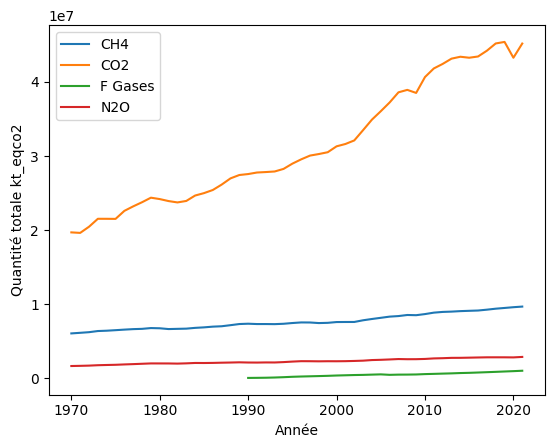

In [53]:
# Quantité par gaz

# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'Substance'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='Substance', values='value_eqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()


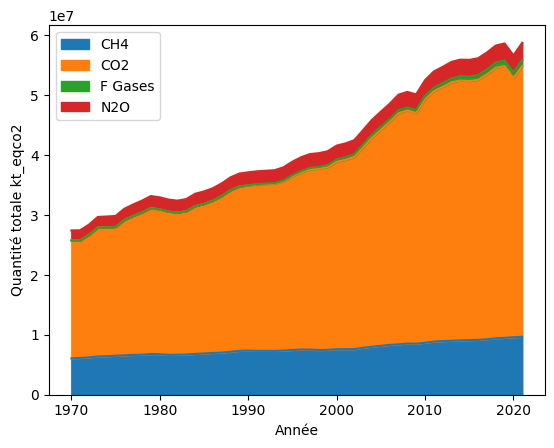

In [54]:
#Graphiques empilés

# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'Substance'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='Substance', values='value_eqco2')

# Tracer le graphique en courbes empilées
df_pivot.plot(kind='area', stacked=True)

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()


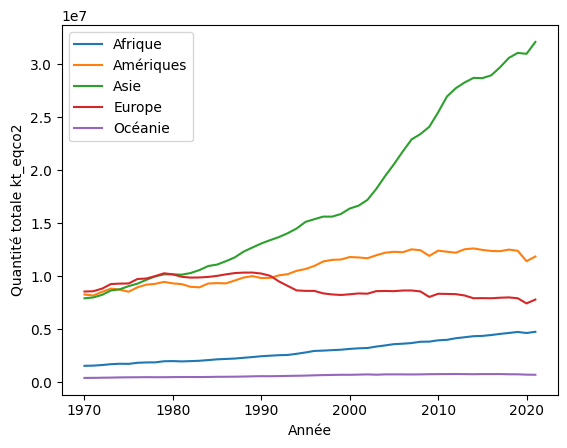

In [55]:
# Quantité par region

# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'Region Name'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='Region Name', values='value_eqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()

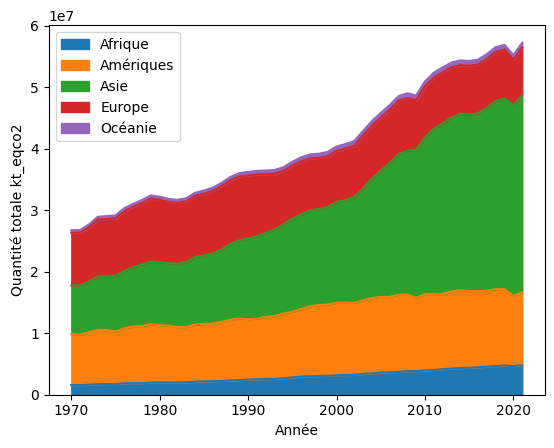

In [56]:
# Graphique empilé
# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'Region Name'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='Region Name', values='value_eqco2')

# Tracer le graphique en courbes empilées
df_pivot.plot(kind='area', stacked=True)

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()

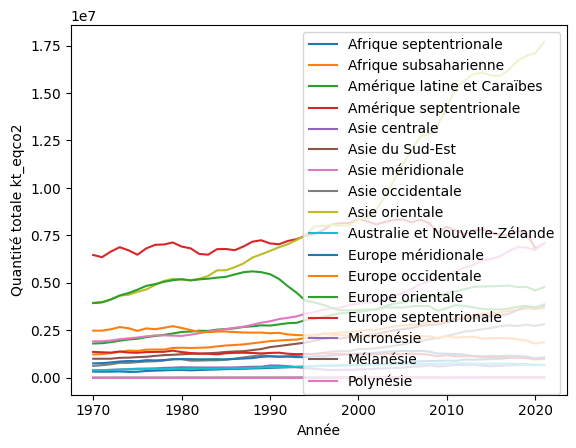

In [58]:
# Quantité par sub-region

# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'Sub-region Name'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='Sub-region Name', values='value_eqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()

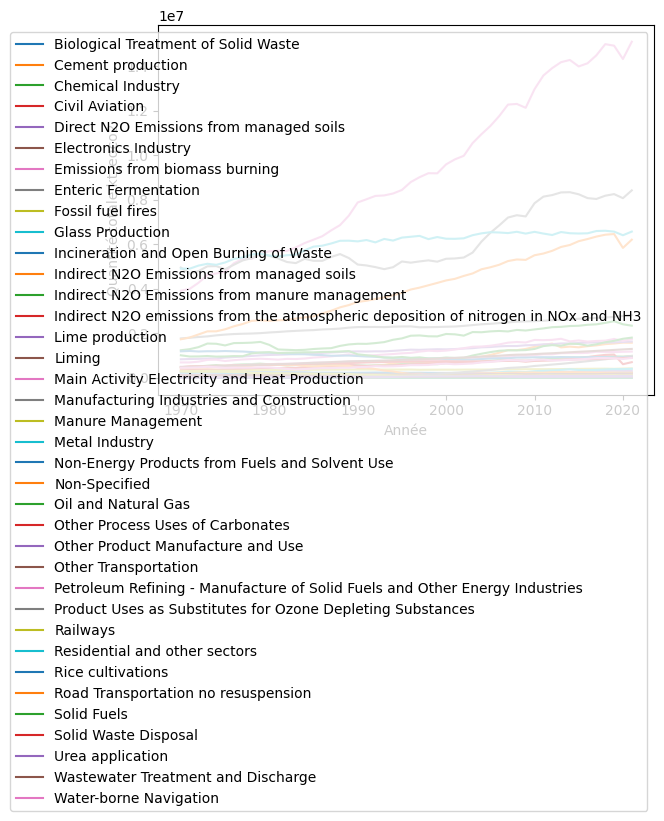

In [59]:
#quantité par secteur


# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_merged_sect_ref.groupby(['year', 'ipcc_code_2006_for_standard_report_name'])['value_eqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='ipcc_code_2006_for_standard_report_name', values='value_eqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale kt_eqco2')


# Afficher le graphique
plt.legend()
plt.show()